In [ ]:
#Importing Required Libraries

In [ ]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
#Assigning Path for Dataset

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/mini project/dataset/train"
TEST_DIR = "/content/drive/MyDrive/mini project/dataset/test"
BATCH_SIZE=64

In [ ]:
import os 
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#see how many categories and images present

In [ ]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 4830 in folder sad
For training data, found 3995 in folder angry
For training data, found 3171 in folder surprise
For training data, found 4965 in folder neutral
For training data, found 7215 in folder happy
For training data, found 4097 in folder fear
For training data, found 436 in folder disgust


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 831 in folder surprise
For testing data, found 958 in folder angry
For testing data, found 1774 in folder happy
For testing data, found 1024 in folder fear
For testing data, found 1247 in folder sad
For testing data, found 1233 in folder neutral
For testing data, found 111 in folder disgust


In [ ]:
#some random images withe their labels

In [ ]:
from typing import OrderedDict
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
      # We will view images from here
    target_folder = target_dir + target_class
     # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
       # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
class_names = ['angry','disgust','fear','happy','sad','surprise','neutral']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


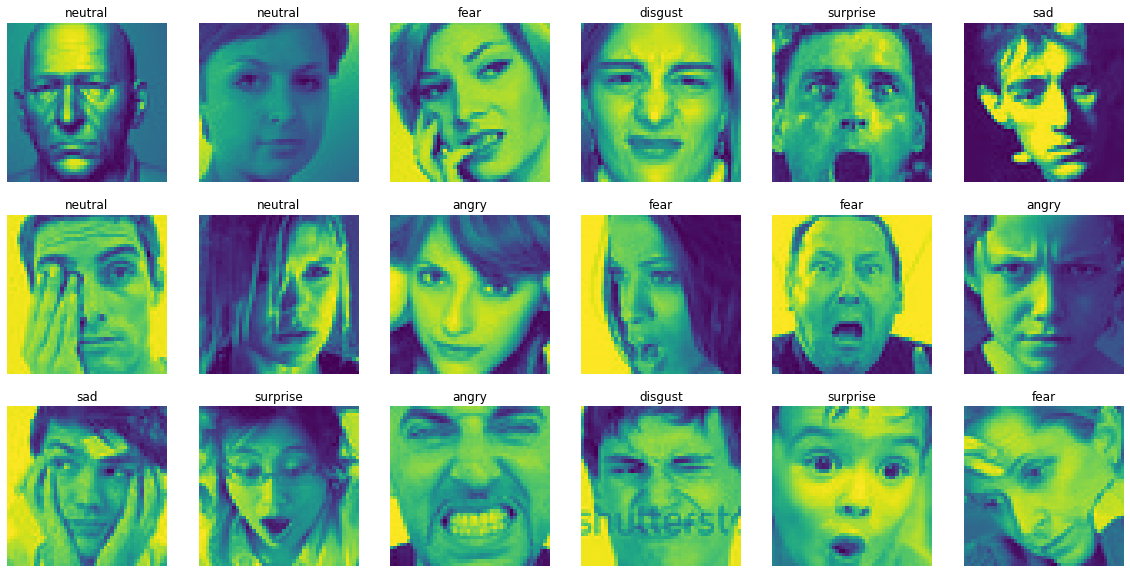

In [ ]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/mini project/dataset/train/", target_class=class_name)

In [ ]:
#Preparing data for training

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
#Basic model building (CNN Classifier)

In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
history = classifier.fit(training_set,
                         epochs = 30,
                         validation_data = test_set)

classifier.save('/content/drive/MyDrive/mini project/model1.h5') 

Epoch 1/30
449/449 [==============================] - 9738s 22s/step - loss: 1.7088 - accuracy: 0.3323 - val_loss: 1.5974 - val_accuracy: 0.3742
Epoch 2/30
449/449 [==============================] - 499s 1s/step - loss: 1.5378 - accuracy: 0.4085 - val_loss: 1.4720 - val_accuracy: 0.4283
Epoch 3/30
449/449 [==============================] - 485s 1s/step - loss: 1.4506 - accuracy: 0.4442 - val_loss: 1.4199 - val_accuracy: 0.4436
Epoch 4/30
449/449 [==============================] - 504s 1s/step - loss: 1.3929 - accuracy: 0.4622 - val_loss: 1.3767 - val_accuracy: 0.4687
Epoch 5/30
449/449 [==============================] - 538s 1s/step - loss: 1.3510 - accuracy: 0.4805 - val_loss: 1.4019 - val_accuracy: 0.4650
Epoch 6/30
449/449 [==============================] - 606s 1s/step - loss: 1.3220 - accuracy: 0.4921 - val_loss: 1.3171 - val_accuracy: 0.4933
Epoch 7/30
449/449 [==============================] - 805s 2s/step - loss: 1.2869 - accuracy: 0.5070 - val_loss: 1.3054 - val_accuracy: 0.49

In [ ]:
#TESTING

In [ ]:
class_lable_pre = {0:'angry',
 1:'disgust',
 2:'fear',
 3:'happy',
 4:'sad',
 5:'surprise',
 6:'neutral'}


In [ ]:
class_names = ['angry','disgust','fear','happy','sad','surprise','neutral']

In [ ]:

model_path = "/content/drive/MyDrive/mini project/model1.h5"
loaded_model = keras.models.load_model(model_path)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import cv2
from PIL import Image

In [ ]:
print(classification_report(test_set,pre[x]))

NameError: ignored

In [ ]:
image = cv2.imread("/content/drive/MyDrive/mini project/dataset/train/angry/Training_10131352.jpg")

In [ ]:
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
print(result)

emot = ""

for x in class_lable_pre.keys():
  # print(x) 
  if result == x:
    emot = class_lable_pre[x]
print("Emotion: ",emot)



1/1 [==============================] - 1s 711ms/step
0


NameError: ignored

In [ ]:
#interface

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
import tensorflow as tf 
import numpy as np
import requests
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

In [ ]:
model=tf.keras.models.load_model(
    "/content/drive/MyDrive/mini project/model1.h5"
)

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,128,128,3)
  img_resize=img_3d
  prediction=model.predict(img_resize)[0]
  for i in range(10):
    if(prediction[i]==1.0):
      print(class_names[i])
      return (class_names[i])
  #return{class_names[prediction]: float(prediction[i]for i in range(10))}
  #return (class_names[prediction])

In [ ]:
image=gr.inputs.Image(shape=(128,128))

label=gr.outputs.Label(num_top_classes=10)

gr.Interface(fn=predict_image, inputs=image, outputs='label',interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 90ms/step
angry
1/1 [==============================] - 0s 33ms/step
angry
1/1 [==============================] - 0s 29ms/step
happy
Keyboard interruption in main thread... closing server.


KeyboardInterrupt: ignored